# **1. Perkenalan Dataset**


Dataset ini berasal dari tahun 1988 dan merupakan gabungan dari empat database (Cleveland, Hungary, Switzerland, dan Long Beach V). Dataset ini berisi 14 atribut yang umum digunakan untuk memprediksi keberadaan penyakit jantung pada pasien.

### Kolom (14 Atribut)

* 👴 **age**: Usia pasien.
* 🚻 **sex**: Jenis kelamin pasien (`1` = laki-laki; `0` = perempuan).
* 💔 **cp** (Chest Pain Type): Tipe nyeri dada (4 nilai).
* 🩸 **trtbps** (Resting Blood Pressure): Tekanan darah istirahat (dalam mm Hg).
* 🧪 **chol** (Serum Cholesterol): Kolesterol serum dalam mg/dl.
* 🍬 **fbs** (Fasting Blood Sugar): Gula darah puasa > 120 mg/dl (`1` = true; `0` = false).
* ❤️ **restecg** (Resting ECG): Hasil elektrokardiografi istirahat (nilai `0`, `1`, `2`).
* 💓 **thalachh** (Max Heart Rate): Detak jantung maksimum yang dicapai.
* 🏋️ **exng** (Exercise Induced Angina): Angina (nyeri dada) akibat olahraga (`1` = ya; `0` = tidak).
* 📉 **oldpeak**: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat.
* 📈 **slp** (Slope): Kemiringan segmen ST puncak olahraga.
* 🔬 **caa** (Number of Major Vessels): Jumlah pembuluh darah utama (`0-3`) yang diwarnai oleh flourosopy.
* ⚪ **thall** (Thalium Stress Test): Hasil tes thalium (`0` = normal; `1` = fixed defect; `2` = reversable defect).
* 🎯 **output** (Target): Variabel target (`0` = tidak ada penyakit jantung; `1` = ada penyakit jantung).

**Sumber Dataset:**
[Heart Disease - Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# ======================
# 1. Import Libraries
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Setup visualisasi
sns.set(style="whitegrid", context="talk", palette="muted")
%matplotlib inline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

## Memuat Dataset (Mount Drive)

In [2]:
# ======================
# 2. Memuat Dataset
# ======================

# 2.1 Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Memuat Dataset (Baca CSV & Tampilkan Head)

In [3]:
# 2.2 Baca file CSV
heart_df = pd.read_csv('/content/drive/MyDrive/Dataset_SML/heart.csv')

# 2.3 Tampilkan 5 baris pertama
print("5 baris pertama dataset:")
display(heart_df.head())

5 baris pertama dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Memuat Dataset (Cek Info)

In [4]:
# 2.4 Info tipe data & jumlah non-null
print("\nInfo dataset:")
heart_df.info()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## EDA (Cek Missing Value & Duplikasi)

In [5]:
# ======================
# 3. Exploratory Data Analysis (EDA)
# ======================

# 3.1 Cek Missing Value & Duplikasi
print("\nJumlah missing value per kolom:")
print(heart_df.isnull().sum())

duplicate_rows = heart_df.duplicated().sum()
print(f"\nJumlah baris duplikat terdeteksi: {duplicate_rows}")


Jumlah missing value per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Jumlah baris duplikat terdeteksi: 723


* Insight :
- Hasil pengecekan kualitas data awal menunjukkan bahwa dataset 100% lengkap tanpa ada missing values, sehingga tidak memerlukan imputasi. Namun, ditemukan masalah integritas data yang kritis, yaitu 723 baris duplikat. Duplikat ini wajib dihapus pada langkah preprocessing untuk mencegah overfitting model yang parah dan memastikan hasil EDA tidak bias.

## EDA (Rename & Mapping Kategori)

In [6]:
# 3.2 Persiapan DataFrame untuk Visualisasi (Mapping Kategori)
# Kita buat 'df' terpisah agar data asli 'heart_df' tetap utuh
df = heart_df.rename(columns={
    "age": "Age",
    "sex": "Sex",
    "cp": "ChestPain",
    "trestbps": "RestingBloodPressure",
    "chol": "Cholesterol",
    "fbs": "FastingBloodSugar",
    "restecg": "RestingECG",
    "thalach": "MaxHeartRate",
    "exang": "ExcerciseAngina",
    "oldpeak": "OldPeak",
    "slope": "STSlope",
    "ca": "nMajorVessels",
    "thal": "Thalium",
    "target": "Status"
}).copy()

# Mapping kategori biar gampang dibaca saat EDA
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0: "False",
        1: "True"
    },
    "RestingECG": {
        0: "Normal",
        1: "Abnormality",
        2: "Hypertrophy"
    },
    "ExcerciseAngina": {
        0: "No",
        1: "Yes"
    },
    "STSlope": {
        0: "Upsloping",
        1: "Flat",
        2: "Downsloping"
    },
    "Thalium": {
        0: "Normal",
        1: "Fixed defect",
        2: "Reversible defect",
        3: "Not described"
    },
    "Status": {
        0: "No Disease",
        1: "Heart Disease"
    }
}

# Terapkan mapping KE df langsung
for col, mapping in mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

print("\n5 baris pertama data setelah rename + mapping kategori (untuk EDA):")
display(df.head())


5 baris pertama data setelah rename + mapping kategori (untuk EDA):


,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,52,Male,Typical angina,125,212,False,Abnormality,168,No,1.0,Downsloping,2,Not described,No Disease
1,53,Male,Typical angina,140,203,True,Normal,155,Yes,3.1,Upsloping,0,Not described,No Disease
2,70,Male,Typical angina,145,174,False,Abnormality,125,Yes,2.6,Upsloping,0,Not described,No Disease
3,61,Male,Typical angina,148,203,False,Abnormality,161,No,0.0,Downsloping,1,Not described,No Disease
4,62,Female,Typical angina,138,294,True,Abnormality,106,No,1.9,Flat,3,Reversible defect,No Disease


* Insight:
- Langkah ini krusial untuk Keterbacaan (Readability) EDA. Saya membuat DataFrame df terpisah khusus untuk visualisasi, lalu me-rename kolom yang kriptik (misal cp -> ChestPain) dan me-mapping nilai numerik (misal Sex=0 -> Sex='Female'). Tujuannya agar semua plot visualisasi (seperti countplot) yang akan dibuat setelah ini menjadi jelas, informatif, dan mudah dipahami oleh reviewer tanpa perlu merujuk kamus data. Ini juga memastikan DataFrame numerik asli tetap utuh untuk preprocessing model.

## EDA (Cek Boxplot Outlier)

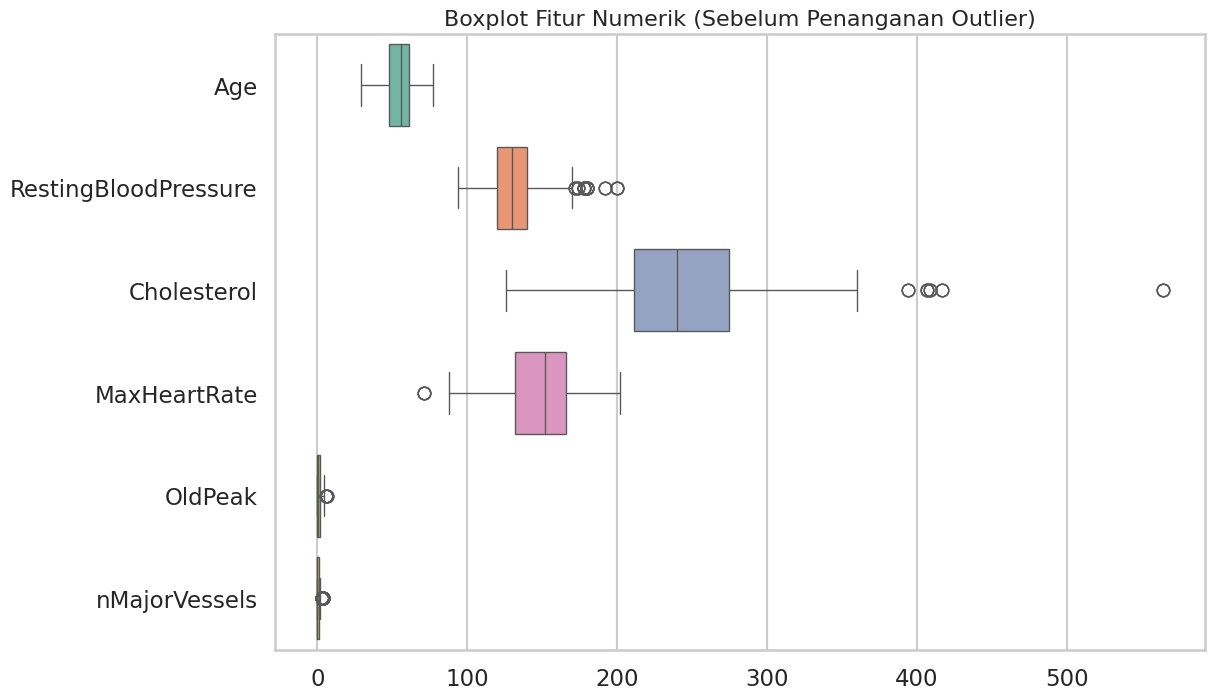

In [7]:
numeric_cols_check = [
    'Age', 'RestingBloodPressure', 'Cholesterol',
    'MaxHeartRate', 'OldPeak', 'nMajorVessels'
]

# Visualisasi Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols_check], orient='h', palette='Set2')
plt.title('Boxplot Fitur Numerik (Sebelum Penanganan Outlier)', fontsize=16)
plt.show()

* Insight:
- Boxplot ini menujukkan adanya outlier yang signifikan (titik-titik di luar garis) pada fitur RestingBloodPressure, Cholesterol, MaxHeartRate, dan OldPeak. Outlier ini, terutama pada Cholesterol yang ekstrem, dapat merusak StandardScaler (yang sensitif terhadap mean dan std). Oleh karena itu, preprocessing selanjutnya wajib menyertakan penanganan outlier (seperti capping IQR) pada fitur-fitur tersebut untuk menstabilkan model. Fitur nMajorVessels tidak dianggap sebagai outlier karena ini adalah data ordinal (hitungan) yang valid.

## EDA (Fungsi Helper Plotting)

In [8]:
# 3.3 Fungsi Helper untuk Plotting
def finalize_plot(title, xlabel=None, ylabel=None):
    plt.title(title, fontsize=16, fontweight='bold')
    if xlabel:
        plt.xlabel(xlabel, fontsize=13)
    if ylabel:
        plt.ylabel(ylabel, fontsize=13)
    plt.tight_layout()

## EDA (Visualisasi Distribusi Target)

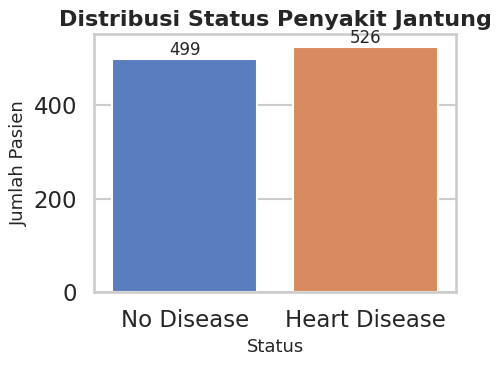

In [9]:
# 3.4 Visualisasi Distribusi Target (Status)
plt.figure(figsize=(5,4))
ax = sns.countplot(
    x='Status',
    data=df,
    hue='Status',
    legend=False
)

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        f"{count}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12
    )

finalize_plot(
    title="Distribusi Status Penyakit Jantung",
    xlabel="Status",
    ylabel="Jumlah Pasien"
)
plt.show()

* Insight :
- Pada chart terlihat bahwa data seimbang dan tidak memerlukan teknik sampling untuk menyeimbangkan datanya

## EDA (Visualisasi Status vs Jenis Kelamin)

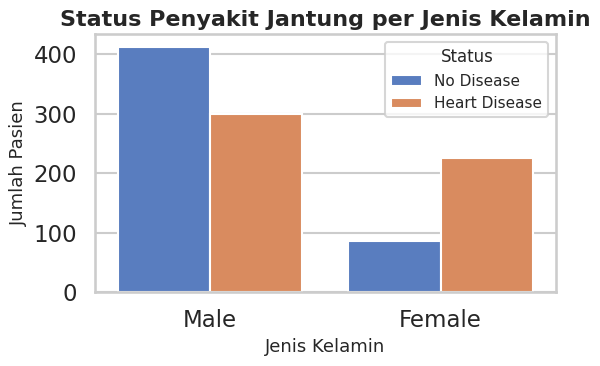

In [10]:
# 3.5 Visualisasi Fitur Kategorikal vs Target
plt.figure(figsize=(6,4))
ax = sns.countplot(
    x='Sex',
    hue='Status',
    data=df
)
finalize_plot(
    title="Status Penyakit Jantung per Jenis Kelamin",
    xlabel="Jenis Kelamin",
    ylabel="Jumlah Pasien"
)
plt.legend(
    title="Status",
    loc='upper right',
    fontsize=11,
    title_fontsize=12
)
plt.show()

* Insight :
- Plot ini menunjukkan interaksi yang kuat antara Sex dan Status. Pada pasien Male (Pria), jumlah yang "No Disease" (sehat) lebih banyak daripada yang "Heart Disease". Namun, tren ini berbalik drastis pada pasien Female (Wanita), di mana jumlah yang "Heart Disease" jauh lebih dominan (lebih dari 2x lipat) dibandingkan yang "No Disease". Ini mengindikasikan bahwa Sex adalah fitur prediktor yang sangat penting untuk model.

## EDA (Visualisasi Status vs Tipe Nyeri Dada)

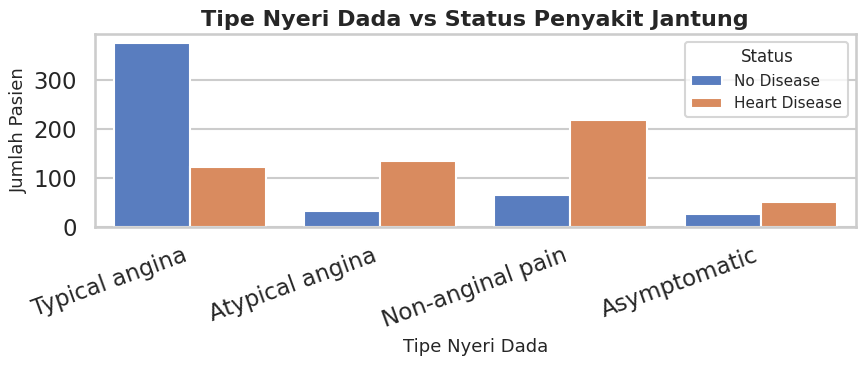

In [11]:
plt.figure(figsize=(9,4))
ax = sns.countplot(
    x='ChestPain',
    hue='Status',
    data=df
)
plt.xticks(rotation=20, ha='right')
finalize_plot(
    title="Tipe Nyeri Dada vs Status Penyakit Jantung",
    xlabel="Tipe Nyeri Dada",
    ylabel="Jumlah Pasien"
)
plt.legend(
    title="Status",
    loc='upper right',
    fontsize=11,
    title_fontsize=12
)
plt.show()

* Insight :
- Tipe Nyeri Dada (ChestPain) adalah prediktor yang sangat kuat. Plot ini menunjukkan bahwa "Typical angina" sangat berkorelasi dengan "No Disease" (sehat). Sebaliknya, untuk tiga tipe lainnya ("Atypical angina", "Non-anginal pain", dan "Asymptomatic"), jumlah pasien "Heart Disease" (sakit) secara konsisten dan signifikan jauh lebih tinggi daripada yang "No Disease". Ini menunjukkan bahwa tipe nyeri dada non-tipikal adalah indikator kuat adanya penyakit jantung dalam dataset ini.

## EDA (Visualisasi Distribusi Fitur Numerik)

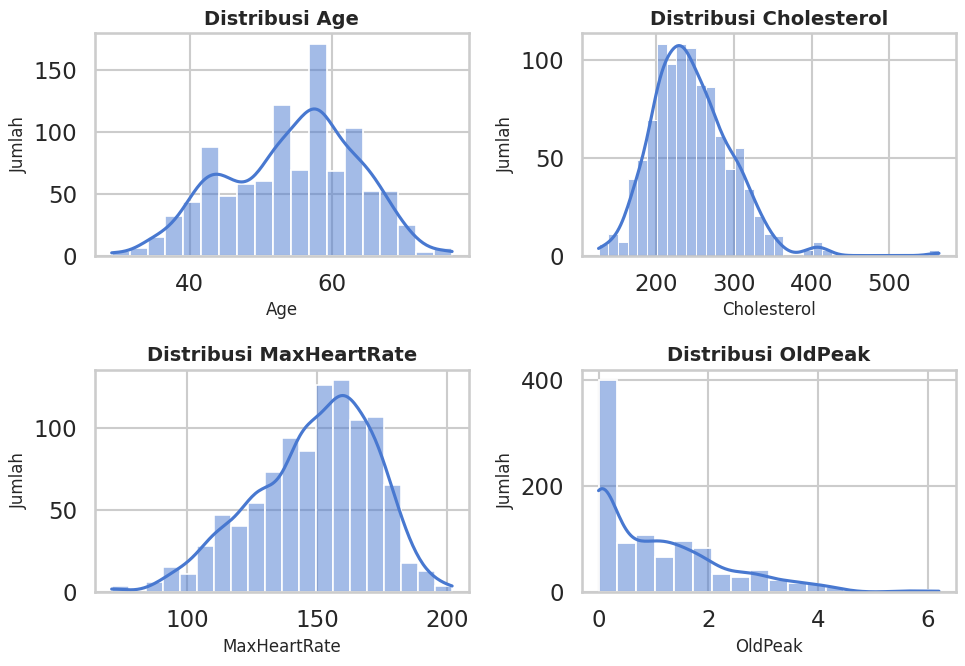

In [12]:
# 3.6 Visualisasi Distribusi Fitur Numerik
numeric_to_plot = ['Age', 'Cholesterol', 'MaxHeartRate', 'OldPeak']
fig, axes = plt.subplots(2, 2, figsize=(10,7))
axes = axes.flatten()

for i, col in enumerate(numeric_to_plot):
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribusi {col}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Jumlah", fontsize=12)

plt.tight_layout()
plt.show()

* Insight :
- Histogram ini menunjukkan distribusi fitur numerik tidak normal. OldPeak sangat miring ke kanan (highly skewed), sementara Cholesterol dan MaxHeartRate juga miring. Kemiringan ini memvalidasi pentingnya penanganan outlier yang harus dilakukan sebelum scaling, agar StandardScaler dapat bekerja secara efektif.

## EDA (Persiapan DataFrame untuk Korelasi)

In [13]:
# 3.7 Matriks Korelasi
# Kita gunakan dataframe baru yang di-rename tapi nilainya tetap numerik
df_numeric_clean = heart_df.rename(columns={
    "age": "Age",
    "sex": "Sex",
    "cp": "ChestPain",
    "trestbps": "RestingBloodPressure",
    "chol": "Cholesterol",
    "fbs": "FastingBloodSugar",
    "restecg": "RestingECG",
    "thalach": "MaxHeartRate",
    "exang": "ExcerciseAngina",
    "oldpeak": "OldPeak",
    "slope": "STSlope",
    "ca": "nMajorVessels",
    "thal": "Thalium",
    "target": "Status"
}).copy()

## EDA (Plot Matriks Korelasi)

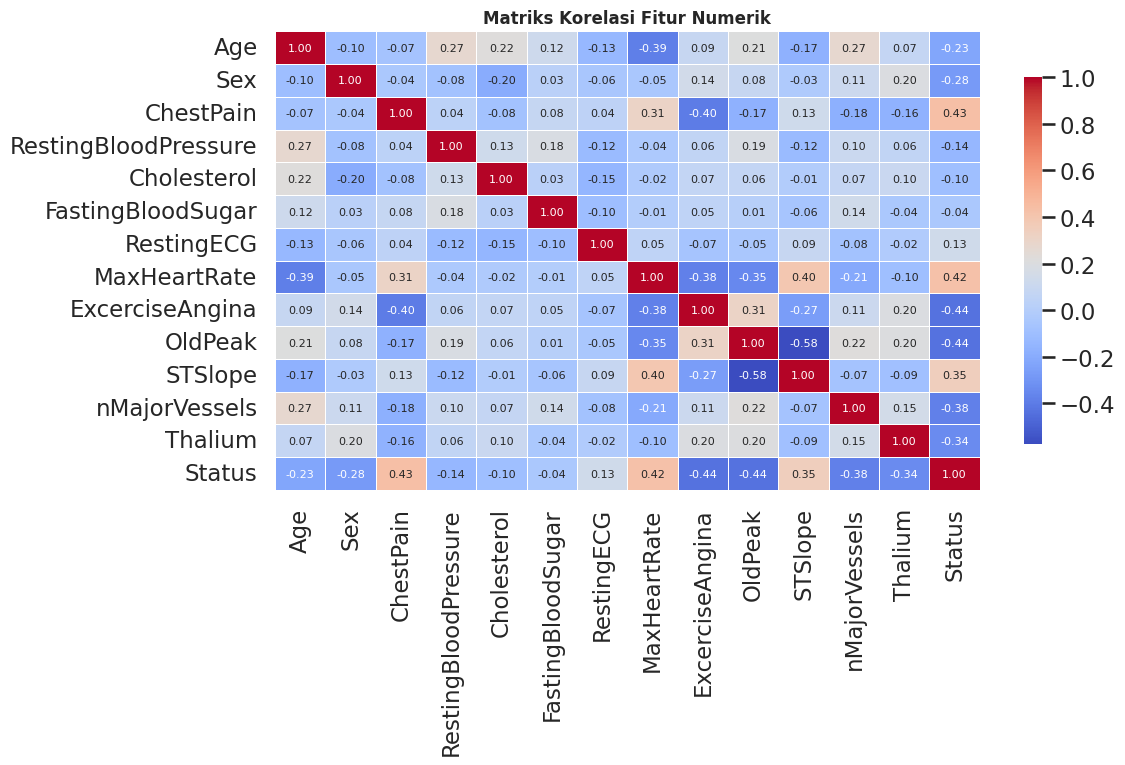

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan df_numeric_clean sudah ada
corr = df_numeric_clean.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)
plt.title("Matriks Korelasi Fitur Numerik", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Preprocessing (Penanganan Data duplikat dan Outlier)

Jumlah baris sebelum hapus duplikat: 1025
Jumlah baris setelah hapus duplikat: 302
--- RestingBloodPressure ---
  Batas Bawah: 90.00, Batas Atas: 170.00
--- Cholesterol ---
  Batas Bawah: 115.38, Batas Atas: 370.38
--- MaxHeartRate ---
  Batas Bawah: 84.12, Batas Atas: 215.12
--- OldPeak ---
  Batas Bawah: -2.40, Batas Atas: 4.00
Penanganan outlier selesai.

Mengecek hasil setelah penanganan outlier...


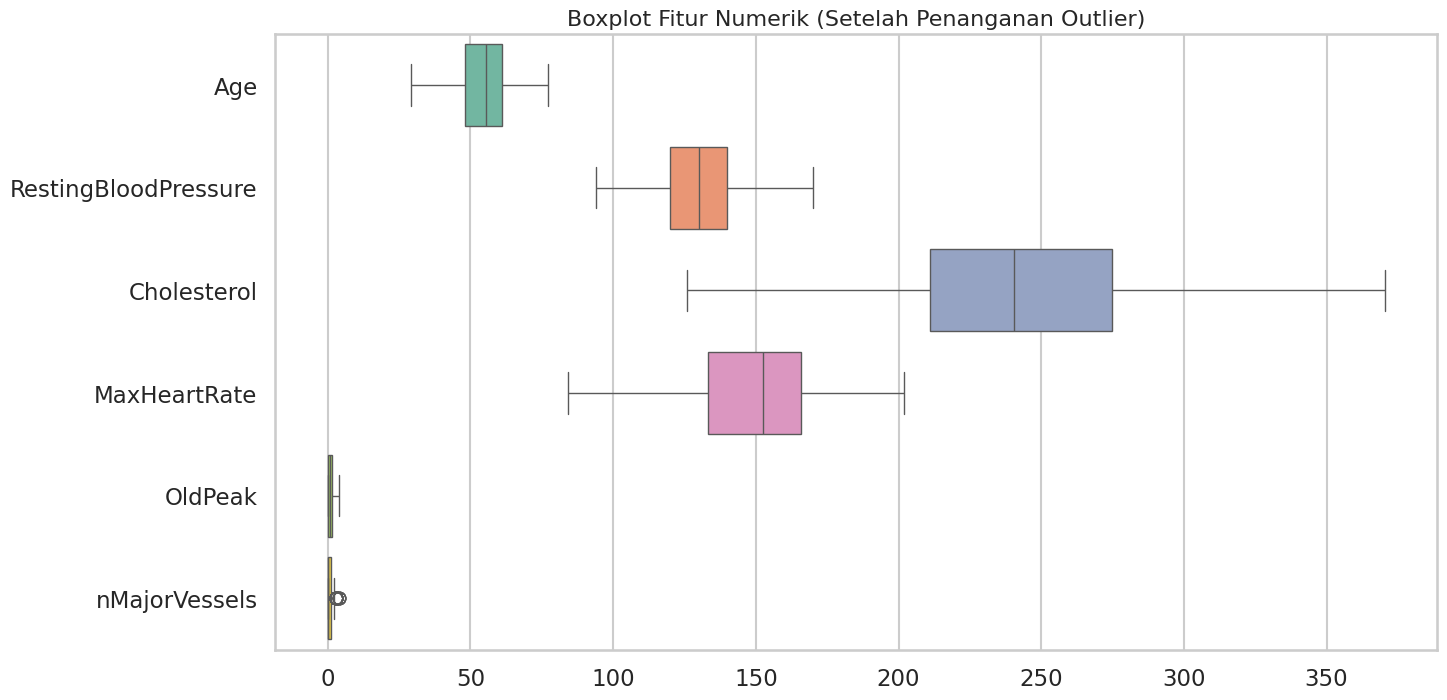

In [15]:
# 4.1 Gunakan DataFrame 'df_numeric_clean' sebagai basis
df_model = df_numeric_clean.copy()

# Menghapus Data Duplikat
print(f"Jumlah baris sebelum hapus duplikat: {len(df_model)}")
df_model = df_model.drop_duplicates()
print(f"Jumlah baris setelah hapus duplikat: {len(df_model)}")

# --- TAMBAHKAN DEFINISI INI KEMBALI ---
numeric_cols = [
    'Age', 'RestingBloodPressure', 'Cholesterol',
    'MaxHeartRate', 'OldPeak', 'nMajorVessels'
]
# --- BATAS TAMBAHAN ---

cols_to_cap = [
    'RestingBloodPressure',
    'Cholesterol',
    'MaxHeartRate',
    'OldPeak'
]

for col in cols_to_cap:
    if col in df_model.columns:
        Q1 = df_model[col].quantile(0.25)
        Q3 = df_model[col].quantile(0.75)
        IQR = Q3 - Q1

        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)

        print(f"--- {col} ---")
        print(f"  Batas Bawah: {batas_bawah:.2f}, Batas Atas: {batas_atas:.2f}")

        # Capping (Membatasi nilai)
        df_model[col] = df_model[col].clip(lower=batas_bawah, upper=batas_atas)

print("Penanganan outlier selesai.")

# --- 4.C: Verifikasi Hasil (Visualisasi Akhir) ---
print("\nMengecek hasil setelah penanganan outlier...")
plt.figure(figsize=(15, 8))
# Baris ini sekarang akan berfungsi karena 'numeric_cols' sudah ada
sns.boxplot(data=df_model[numeric_cols], orient='h', palette='Set2')
plt.title('Boxplot Fitur Numerik (Setelah Penanganan Outlier)', fontsize=16)
plt.show()

* Insight
- Kode ini menerapkan metode capping IQR. Berdasarkan visualisasi boxplot awal, outlier ditangani pada kolom RestingBloodPressure, Cholesterol, MaxHeartRate, dan OldPeak dengan membatasi nilainya pada 1.5 IQR. Fitur nMajorVessels sengaja tidak ditangani karena merupakan data ordinal yang valid.

## Preprocessing (Pisah Fitur & Target, Definisikan Kolom)

In [16]:




# 4.2 Pisahkan fitur (X) dan target (y)
X = df_model.drop(columns=['Status'])
y = df_model['Status']

# 4.3 Identifikasi kolom kategorikal dan numerik
categorical_cols = [
    'Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG',
    'ExcerciseAngina', 'STSlope', 'Thalium'
]
numeric_cols = [
    'Age', 'RestingBloodPressure', 'Cholesterol',
    'MaxHeartRate', 'OldPeak', 'nMajorVessels'
]

print("\nKolom kategorikal:", categorical_cols)
print("Kolom numerik:", numeric_cols)


Kolom kategorikal: ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium']
Kolom numerik: ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']


## Preprocessing (One-Hot Encoding)

In [17]:
# --- Langkah 1: One-Hot Encoding Fitur Kategorikal ---
print("\nMelakukan One-Hot Encoding...")
X_cat = pd.get_dummies(
    X[categorical_cols].astype(str), # Jadikan str dulu agar aman
    columns=categorical_cols,
    drop_first=True
)
display(X_cat.head())


Melakukan One-Hot Encoding...


,Sex_1,ChestPain_1,ChestPain_2,ChestPain_3,FastingBloodSugar_1,RestingECG_1,RestingECG_2,ExcerciseAngina_1,STSlope_1,STSlope_2,Thalium_1,Thalium_2,Thalium_3
0,True,False,False,False,False,True,False,False,False,True,False,False,True
1,True,False,False,False,True,False,False,True,False,False,False,False,True
2,True,False,False,False,False,True,False,True,False,False,False,False,True
3,True,False,False,False,False,True,False,False,False,True,False,False,True
4,False,False,False,False,True,True,False,False,True,False,False,True,False


## Preprocessing (Scaling Fitur Numerik)

In [18]:
# --- Langkah 2: Scaling Fitur Numerik ---
print("\nMelakukan Standard Scaling...")
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X[numeric_cols]),
    columns=numeric_cols # Ganti nama kolom nanti agar unik
)
# Ubah nama kolom agar tidak bentrok
X_num_scaled.columns = [f"{col}_scaled" for col in numeric_cols]
display(X_num_scaled.head())


Melakukan Standard Scaling...


,Age_scaled,RestingBloodPressure_scaled,Cholesterol_scaled,MaxHeartRate_scaled,OldPeak_scaled,nMajorVessels_scaled
0,-0.267966,-0.377511,-0.704039,0.808993,-0.025091,1.274980
1,-0.157260,0.527318,-0.893880,0.237018,1.869266,-0.714911
2,1.724733,0.828927,-1.505591,-1.082925,1.418229,-0.714911
3,0.728383,1.009893,-0.893880,0.501006,-0.927166,0.280034
4,0.839089,0.406674,1.025627,-1.918889,0.786777,2.269926


## Preprocessing (Gabungkan Fitur & Target)

In [19]:
# --- Langkah 3: Gabungkan Kembali ---
print("\nMenggabungkan semua fitur yang sudah diproses...")
# Pastikan reset_index agar tidak ada error penggabungan
X_processed = pd.concat(
    [
        X_num_scaled.reset_index(drop=True),
        X_cat.reset_index(drop=True)
    ],
    axis=1
)

# Gabungkan dengan target ke satu dataframe final
final_df = pd.concat(
    [X_processed, y.reset_index(drop=True)],
    axis=1
)

print("\nShape final_df (siap latih model):", final_df.shape)
print("5 baris pertama data yang sudah diproses:")
display(final_df.head())


Menggabungkan semua fitur yang sudah diproses...

Shape final_df (siap latih model): (302, 20)
5 baris pertama data yang sudah diproses:


,Age_scaled,RestingBloodPressure_scaled,Cholesterol_scaled,MaxHeartRate_scaled,OldPeak_scaled,nMajorVessels_scaled,Sex_1,ChestPain_1,ChestPain_2,ChestPain_3,FastingBloodSugar_1,RestingECG_1,RestingECG_2,ExcerciseAngina_1,STSlope_1,STSlope_2,Thalium_1,Thalium_2,Thalium_3,Status
0,-0.267966,-0.377511,-0.704039,0.808993,-0.025091,1.274980,True,False,False,False,False,True,False,False,False,True,False,False,True,0
1,-0.157260,0.527318,-0.893880,0.237018,1.869266,-0.714911,True,False,False,False,True,False,False,True,False,False,False,False,True,0
2,1.724733,0.828927,-1.505591,-1.082925,1.418229,-0.714911,True,False,False,False,False,True,False,True,False,False,False,False,True,0
3,0.728383,1.009893,-0.893880,0.501006,-0.927166,0.280034,True,False,False,False,False,True,False,False,False,True,False,False,True,0
4,0.839089,0.406674,1.025627,-1.918889,0.786777,2.269926,False,False,False,False,True,True,False,False,True,False,False,True,False,0


## Preprocessing (Train-Test Split)

In [20]:
# --- Langkah 4: Train-Test Split ---
print("\nMelakukan Train-Test Split...")
X_final = final_df.drop(columns=['Status'])
y_final = final_df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.3,
    random_state=42,
    stratify=y_final
)

print("Ukuran data hasil split:")
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")


Melakukan Train-Test Split...
Ukuran data hasil split:
X_train: (211, 19)
X_test : (91, 19)


## Preprocessing (Simpan Hasil)

In [21]:
# --- Langkah 5: Simpan dataset ---
output_path = "/content/drive/MyDrive/Dataset_SML/heart_preprocessed.csv"
final_df.to_csv(output_path, index=False)
print(f"\nDataset hasil preprocessing disimpan di:\n{output_path}")


Dataset hasil preprocessing disimpan di:
/content/drive/MyDrive/Dataset_SML/heart_preprocessed.csv
